<a href="https://colab.research.google.com/github/maro000/for_data_analysis_and_visualization/blob/master/heatmap_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
flight_dframe = sns.load_dataset('flights')

In [12]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [14]:

flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


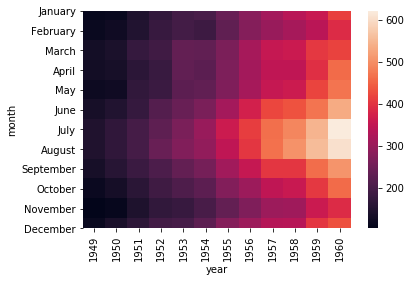

In [19]:
sns.heatmap(flight_dframe)

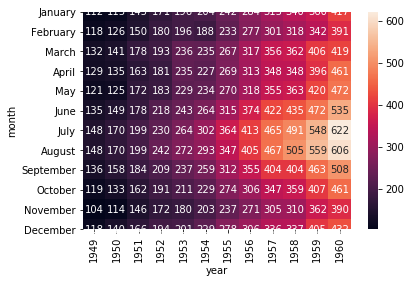

In [16]:
sns.heatmap(flight_dframe, annot=True, fmt='d')

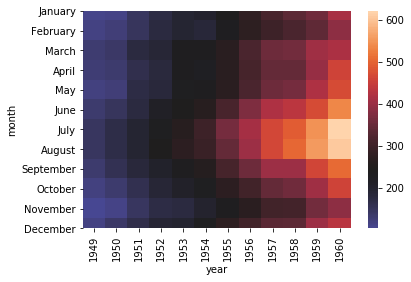

In [18]:
sns.heatmap(flight_dframe, center= flight_dframe.loc['January',1955])

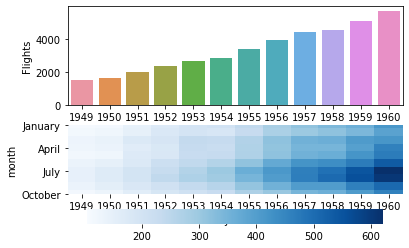

In [20]:
f, (axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

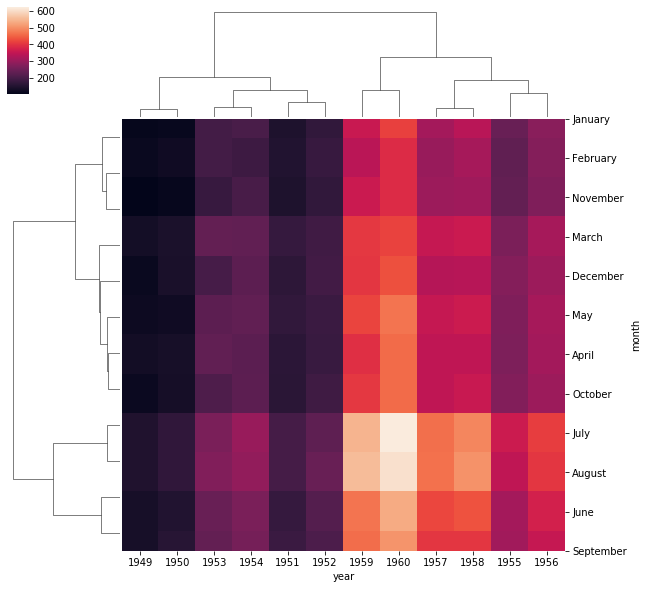

In [21]:
sns.clustermap(flight_dframe)